In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np

In [3]:
file = joblib.load("/media/nadinespy/NewVolume1/work/current_projects/viiit/viiit_with_miguel/IntegratedInformationInVariationalInference/results/analyses/discrete_steady_state_df_00_001_00_1_0_001.pkl")

In [5]:
df = file

In [6]:
df.head()

,correlation,error_variance,time_lag,weight,phi,phiR,kldiv,double_red,rtr,rtx,...,str,stx,sty,sts,synergy_phiid,transfer_phiid,emergence_capacity_phiid,downward_causation_phiid,phi_phiid,phiR_phiid
0,0.0,0.01,1,0.000000,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0+0.0j,0.0+0.0j,...,0.000202+0.000000j,-0.000202+0.000000j,-0.000202+0.000000j,0.000404+0.000000j,0.0+0.0j,0.0+0.0j,0.000202+0.000000j,-0.000202+0.000000j,0.0+0.0j,0.0+0.0j
1,0.0,0.01,1,0.111111,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0+0.0j,0.0+0.0j,...,0.000202+0.000000j,-0.000202+0.000000j,-0.000202+0.000000j,0.000404+0.000000j,0.0+0.0j,0.0+0.0j,0.000202+0.000000j,-0.000202+0.000000j,0.0+0.0j,0.0+0.0j
2,0.0,0.01,1,0.222222,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0+0.0j,0.0+0.0j,...,0.000202+0.000000j,-0.000202+0.000000j,-0.000202+0.000000j,0.000404+0.000000j,0.0+0.0j,0.0+0.0j,0.000202+0.000000j,-0.000202+0.000000j,0.0+0.0j,0.0+0.0j
3,0.0,0.01,1,0.333333,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0+0.0j,0.0+0.0j,...,0.000202+0.000000j,-0.000202+0.000000j,-0.000202+0.000000j,0.000404+0.000000j,0.0+0.0j,0.0+0.0j,0.000202+0.000000j,-0.000202+0.000000j,0.0+0.0j,0.0+0.0j
4,0.0,0.01,1,0.444444,-1.387779e-15,-1.387779e-15,5.025126e-07,0.0,0.0+0.0j,0.0+0.0j,...,0.000202+0.000000j,-0.000202+0.000000j,-0.000202+0.000000j,0.000404+0.000000j,0.0+0.0j,0.0+0.0j,0.000202+0.000000j,-0.000202+0.000000j,0.0+0.0j,0.0+0.0j


In [7]:
df.columns

Index(['correlation', 'error_variance', 'time_lag', 'weight', 'phi', 'phiR',
       'kldiv', 'double_red', 'rtr', 'rtx', 'rty', 'rts', 'xtr', 'xtx', 'xty',
       'xts', 'ytr', 'ytx', 'yty', 'yts', 'str', 'stx', 'sty', 'sts',
       'synergy_phiid', 'transfer_phiid', 'emergence_capacity_phiid',
       'downward_causation_phiid', 'phi_phiid', 'phiR_phiid'],
      dtype='object')

In [8]:
quantities = ['phi', 'phiR', 'double_red', 'rtr', 'sts',
              'synergy_phiid', 'transfer_phiid',
              'emergence_capacity_phiid', 'downward_causation_phiid',
              'phi_phiid', 'phiR_phiid']

phi - 0.15
phiR - 0.58
double_red - 0.15
rtr - 0.93
sts - 0.96
synergy_phiid - 0.96
transfer_phiid - 0.98
emergence_capacity_phiid - 0.96
downward_causation_phiid - 0.98
phi_phiid - 0.92


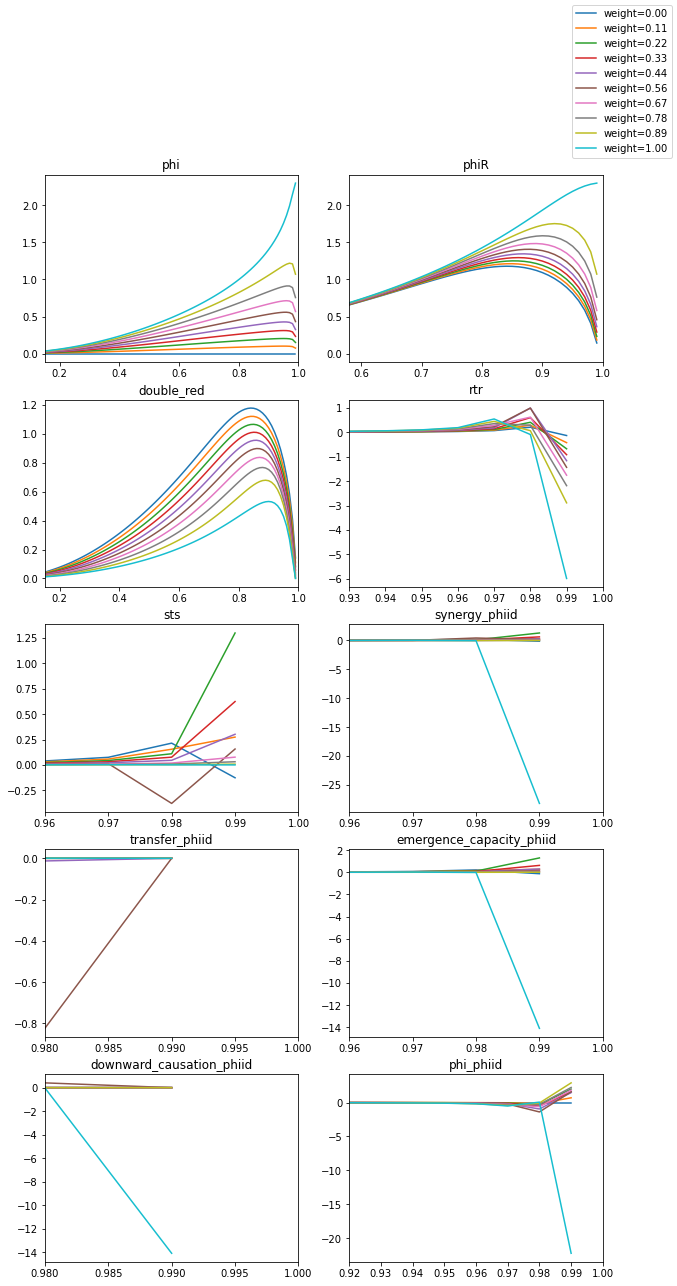

In [22]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for quantity, ax in zip(quantities, axes):
    for weight, grp in df.groupby("weight"):
        if quantity == "phi":
            ax.plot(grp["correlation"], grp[quantity], "-",
                   label=f"weight={weight:.2f}")
        else:
            ax.plot(grp["correlation"], grp[quantity], "-")
    ax.set_title(f"{quantity}")
    std_idx = (
        df.groupby("correlation")[quantity].std() > 0.01).cumsum()
    first_real_val = std_idx[std_idx==1].index.values[0]
    print(f"{quantity} - {first_real_val}")
    ax.set_xlim(first_real_val, 1.0)
fig.legend()